In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('words_glasgow.csv')

In [3]:
df.head(20)

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0
5,abdomen,7,4.714,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,1490684.0
6,abdominal,9,3.875,5.212,4.667,5.735,5.030,4.807,5.706,3.788,4.242,0,3090148.0
7,abduct,6,4.677,2.177,3.065,4.441,4.265,4.364,5.030,4.438,5.000,0,126225.0
8,abducted,8,5.344,1.969,2.871,4.813,4.212,5.406,5.290,5.161,4.546,0,837949.0
9,abduction,9,5.324,1.618,2.886,4.912,4.800,4.441,5.114,5.059,4.686,0,1188510.0


In [4]:
df.isna().sum().sum()

14

# Linear interpolation (NAN values)

In [5]:
intp = df['web_corpus_freq'].interpolate(method="linear")
df['web_corpus_freq_IL'] = df['web_corpus_freq'].fillna(intp)

# Quartiles

In [6]:
Q1min = df['arousal'].quantile(0.25, interpolation='linear')
Q1max = df['arousal'].quantile(0.75, interpolation='linear')

In [7]:
Q2min = df['valence'].quantile(0.25, interpolation ='linear')
Q2max = df['valence'].quantile(0.75, interpolation ='linear')

In [8]:
Q3min = df['dominance'].quantile(0.25, interpolation='linear')
Q3max = df['dominance'].quantile(0.75, interpolation='linear')

In [9]:
Q4min = df['concreteness'].quantile(0.25, interpolation='linear')
Q4max = df['concreteness'].quantile(0.75, interpolation='linear')

In [10]:
Q5min = df['imageability'].quantile(0.25, interpolation='linear')
Q5max = df['imageability'].quantile(0.75, interpolation='linear')

In [11]:
Q6min = df['familiarity'].quantile(0.25, interpolation='linear')
Q6max = df['familiarity'].quantile(0.75, interpolation='linear')

In [12]:
Q7min = df['aoa'].quantile(0.25, interpolation='linear')
Q7max = df['aoa'].quantile(0.75, interpolation='linear')

In [13]:
Q8min = df['semsize'].quantile(0.25, interpolation='linear')
Q8max = df['semsize'].quantile(0.75, interpolation='linear')

In [14]:
Q9min = df['gender'].quantile(0.25, interpolation='linear')
Q9max = df['gender'].quantile(0.75, interpolation='linear')

# Quantiles 

In [15]:
Q1tot = Q1max-Q1min #arousal
Lowerfence1 = Q1min - 1.5*Q1tot
Upperfence1 = Q1max + 1.5*Q1tot

In [16]:
Q2tot = Q2max-Q2min #valence
Lowerfence2 = Q2min - 1.5*Q2tot
Upperfence2 = Q2max + 1.5*Q2tot

In [17]:
Q3tot = Q3max-Q3min #dominance
Lowerfence3 = Q3min - 1.5*Q3tot
Upperfence3 = Q3max + 1.5*Q3tot

In [18]:
Q4tot = Q4max-Q4min #concreteness 
Lowerfence4 = Q4min - 1.5*Q4tot
Upperfence4 = Q4max + 1.5*Q4tot

In [19]:
Q5tot = Q5max-Q5min #imageability
Lowerfence5 = Q5min - 1.5*Q5tot
Upperfence5 = Q5max + 1.5*Q5tot

In [20]:
Q6tot = Q6max-Q6min #familiarity
Lowerfence6 = Q6min - 1.5*Q6tot
Upperfence6 = Q6max + 1.5*Q6tot

In [21]:
Q7tot = Q7max-Q7min #aoa
Lowerfence7 = Q7min - 1.5*Q7tot
Upperfence7 = Q7max + 1.5*Q7tot

In [22]:
Q8tot = Q8max-Q8min #semsize
Lowerfence8 = Q8min - 1.5*Q8tot
Upperfence8 = Q8max + 1.5*Q8tot

In [23]:
Q9tot = Q9max-Q9min #gender
Lowerfence9 = Q9min - 1.5*Q9tot
Upperfence9 = Q9max + 1.5*Q9tot

# Outliers 

In [24]:
OUTLIERS1 = df.loc[(df['arousal'] < Lowerfence1)  |  (df['arousal'] > Upperfence1)]

In [25]:
OUTLIERS2 = df.loc[(df['valence'] < Lowerfence2)  |  (df['valence'] > Upperfence2)]

In [26]:
OUTLIERS3 = df.loc[(df['dominance'] < Lowerfence3)  |  (df['dominance'] > Upperfence3)]

In [27]:
OUTLIERS4 = df.loc[(df['concreteness'] < Lowerfence4)  |  (df['concreteness'] > Upperfence4)]

In [28]:
OUTLIERS5 = df.loc[(df['imageability'] < Lowerfence5)  |  (df['imageability'] > Upperfence5)]

In [29]:
OUTLIERS6 = df.loc[(df['familiarity'] < Lowerfence6)  |  (df['familiarity'] > Upperfence6)]

In [30]:
OUTLIERS7 = df.loc[(df['aoa'] < Lowerfence7)  |  (df['aoa'] > Upperfence7)]

In [31]:
OUTLIERS8 = df.loc[(df['semsize'] < Lowerfence8)  |  (df['semsize'] > Upperfence8)]

In [32]:
OUTLIERS9 = df.loc[(df['gender'] < Lowerfence9)  |  (df['gender'] > Upperfence9)]

# Histograms

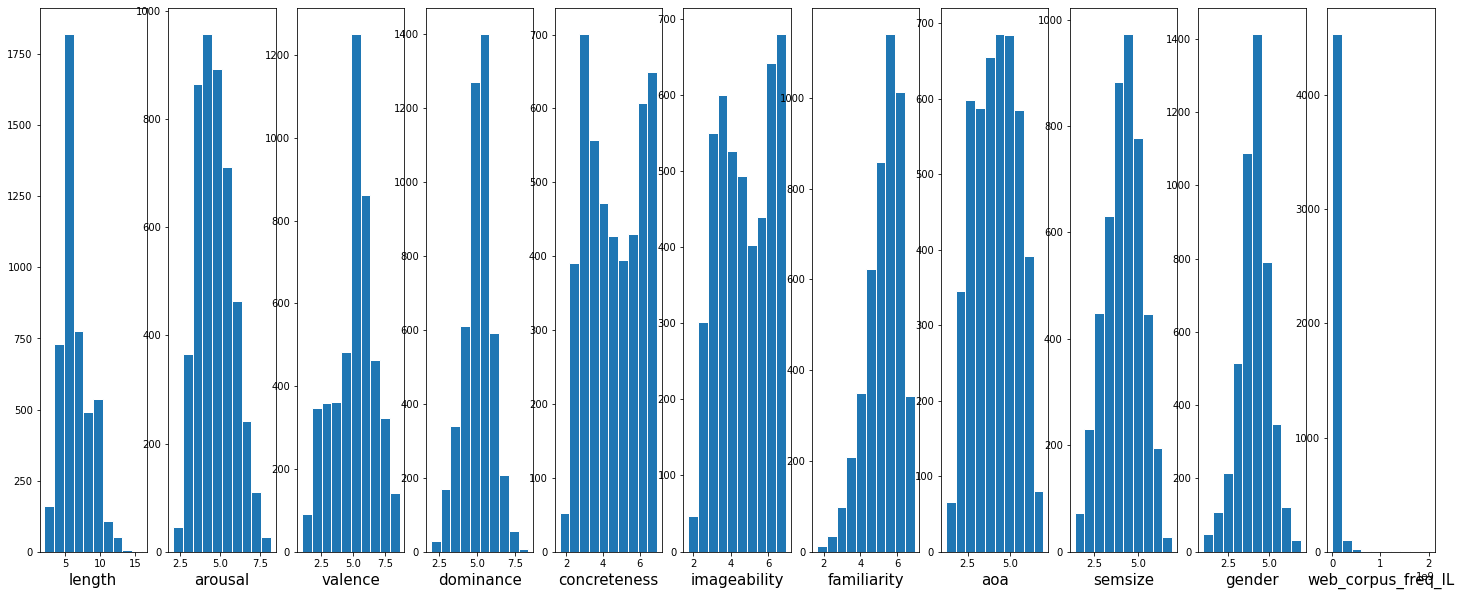

In [66]:
cols = [col for col in df.columns if col != 'class' and col != 'word' and col != 'polysemy' and col != 'web_corpus_freq']

fig, ax = plt.subplots(1,len(cols), figsize=(25, 10))
for i, c in enumerate(cols):
    ax[i].hist(df[c], edgecolor='white')
    
    ax[i].set_xlabel(c, fontsize=15)

# Boxplots

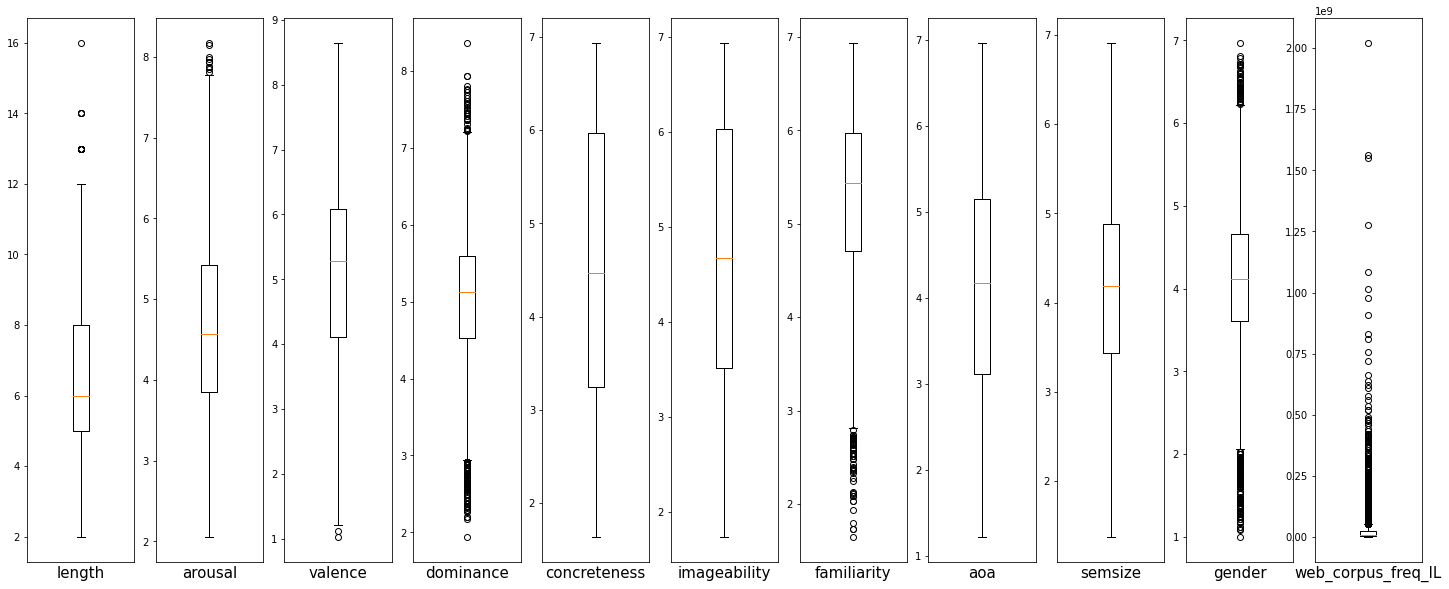

In [69]:
cols = [col for col in df.columns if col != 'class' and col != 'word' and col != 'polysemy' and col != 'web_corpus_freq']
fig, ax = plt.subplots(1,len(cols), figsize=(25, 10))

for i, c in enumerate(cols):
    ax[i].boxplot(df[c])
    
    ax[i].set_xticks([])
    ax[i].set_xlabel(c, fontsize=15)

# Violinplots

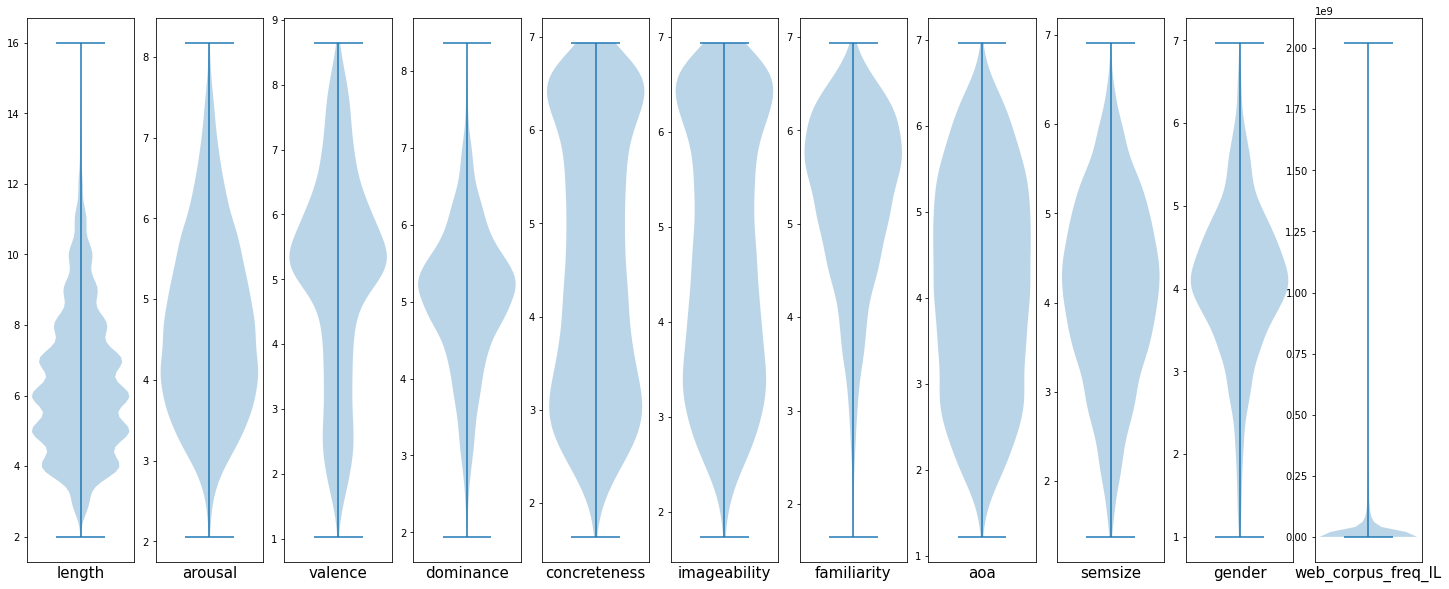

In [68]:
cols = [col for col in df.columns if col != 'class' and col != 'word' and col != 'polysemy' and col != 'web_corpus_freq']
fig, ax = plt.subplots(1,len(cols), figsize=(25, 10))

for i, c in enumerate(cols):
    ax[i].violinplot(df[c])
    
    ax[i].set_xticks([])
    ax[i].set_xlabel(c, fontsize=15)

In [42]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,web_corpus_freq_IL
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720,-0.156595
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100,-0.010490
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744,0.135975
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664,0.102611
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652,-0.037856
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132,-0.056211
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419,0.277642
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596,-0.225964
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869,0.080580
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679,-0.036185


In [43]:
df.drop(columns=['imageability'])

,word,length,arousal,valence,dominance,concreteness,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,web_corpus_freq_IL
0,abattoir,8,4.200,2.864,4.333,5.455,2.382,6.760,4.652,5.391,0,160074.0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,3.324,5.177,5.121,3.303,0,4224864.0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,5.121,5.543,2.667,3.971,0,140105.0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,3.971,6.233,4.679,5.167,0,124123.0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,3.097,6.407,5.083,4.571,0,128143.0,128143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4677,zeppelin,8,6.185,5.000,5.333,6.286,3.167,6.036,5.464,5.269,0,3192943.0,3192943.0
4678,zero,4,4.031,4.182,4.567,2.688,6.269,2.636,1.758,4.172,0,30735412.0,30735412.0
4679,zest,4,5.969,6.818,6.121,4.438,4.000,5.364,2.636,3.452,0,655010.0,655010.0
4680,zoo,3,5.909,6.235,5.485,6.118,5.655,2.324,4.844,4.059,0,11589578.0,11589578.0


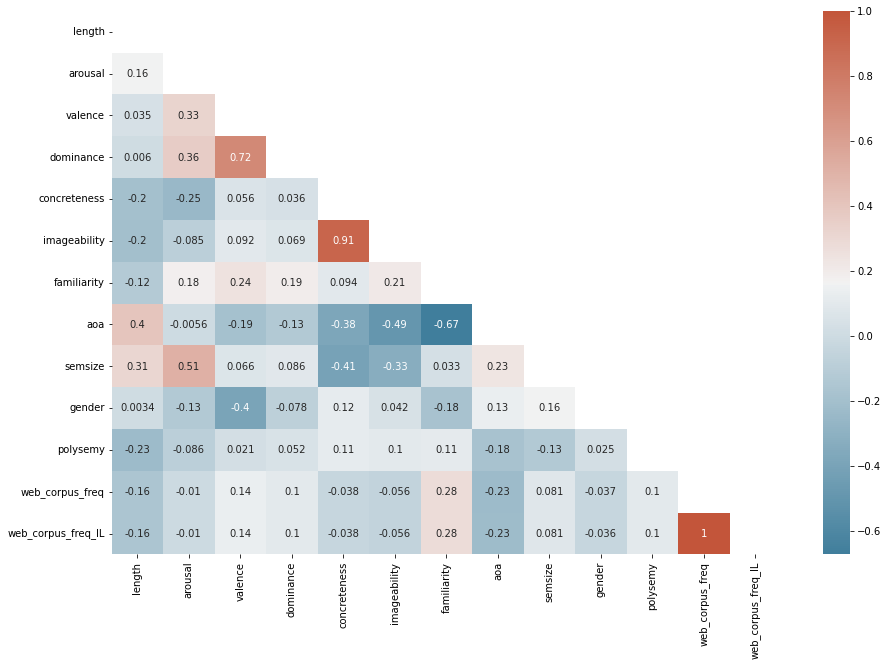

In [44]:
plt.figure(figsize=(15,10))
a = df.corr()
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(a, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(a, annot=True, mask = mask, cmap=cmap)
plt.show()

In [45]:
#check word legth
for i in range(len(df)):
    if len(df.iloc[i,0]) != df.iloc[i,1]:
        print(df.iloc[i,0])
else:
    print('ok')

ok


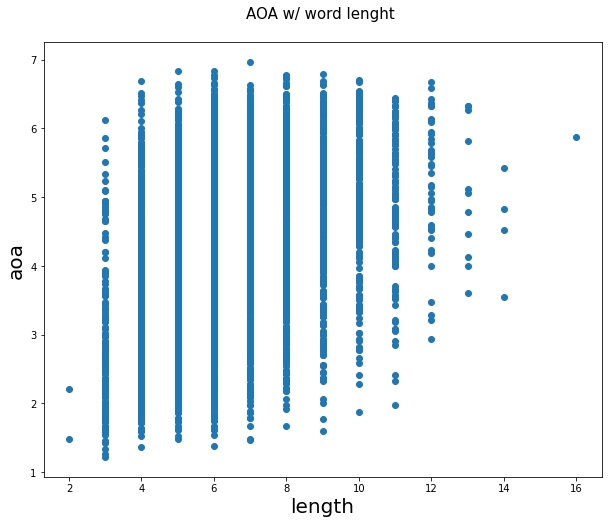

In [46]:
plt.figure(figsize = (10,8))
plt.scatter(df['length'], df['aoa'])
plt.xlabel("length", fontsize=20)
plt.ylabel("aoa", fontsize=20)
plt.title("AOA w/ word lenght \n", fontsize=15)
plt.show()

In [47]:
pclass_xt = pd.crosstab(df['length'], df['polysemy'])

In [48]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

polysemy,0,1
length,,
2,1.000000,0.000000
3,0.764331,0.235669
4,0.808743,0.191257
5,0.870614,0.129386
6,0.945055,0.054945
7,0.970399,0.029601
8,0.983740,0.016260
9,0.993671,0.006329
10,0.995475,0.004525


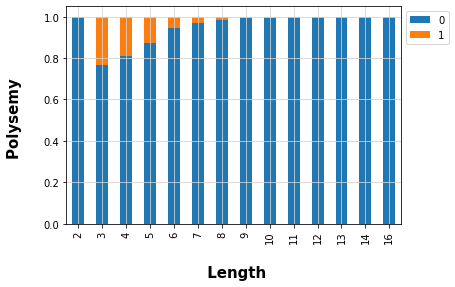

In [49]:
plt.rcParams['axes.facecolor'] = 'w'
pclass_xt_pct.plot(kind='bar', stacked=True)
plt.xlabel('\n Length', fontsize = 15, fontweight='bold')
plt.ylabel('Polysemy \n', fontsize = 15, fontweight='bold')
plt.grid(color='lightgray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

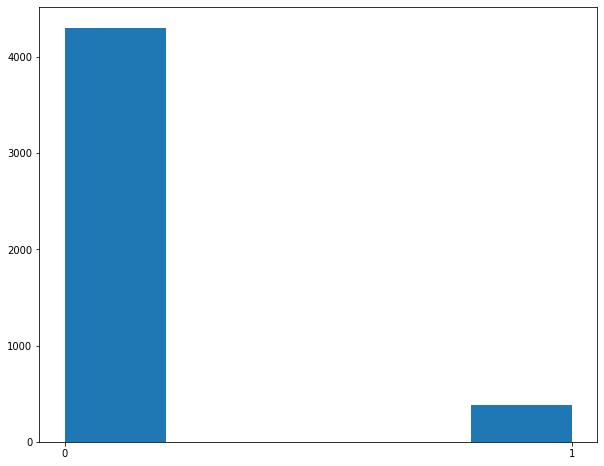

In [50]:
plt.figure(figsize = (10,8))
plt.hist(df['polysemy'], bins=5)
plt.xticks([0, 1])

plt.show()

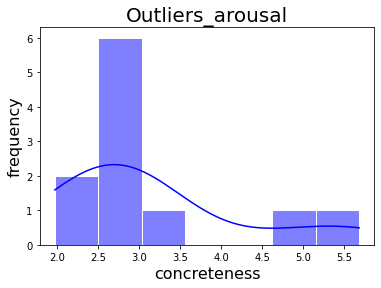

N° High_Outliers 11


In [51]:
sns.histplot(data=OUTLIERS1, x=OUTLIERS1["concreteness"], color="Blue", kde=True, edgecolor="white")
plt.title("Outliers_arousal", fontsize=20)
plt.xlabel("concreteness", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° High_Outliers", OUTLIERS1["word"].count())

In [52]:
OUTLIERS9NEG = df.loc[(df['gender'] < Lowerfence9)]

In [53]:
OUTLIERS9POS =  df.loc[(df['gender'] > Upperfence9)]

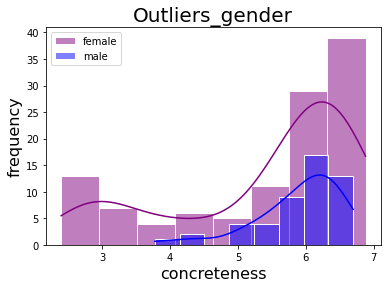

N° Low_Outliers 114
N° High_Outliers 50


In [54]:
sns.histplot(data=OUTLIERS9NEG, x=OUTLIERS9NEG["concreteness"], color="purple", kde=True, edgecolor="white", label="female")
sns.histplot(data=OUTLIERS9POS, x=OUTLIERS9POS["concreteness"], color="blue", kde=True, edgecolor="white", label="male")
plt.legend()
plt.title("Outliers_gender", fontsize=20)
plt.xlabel("concreteness", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° Low_Outliers", OUTLIERS9NEG["word"].count())
print("N° High_Outliers", OUTLIERS9POS["word"].count())

In [55]:
OUTLIERS3NEG = df.loc[(df['dominance'] < Lowerfence3)]

In [56]:
OUTLIERS3POS = df.loc[(df['dominance'] > Upperfence3)]

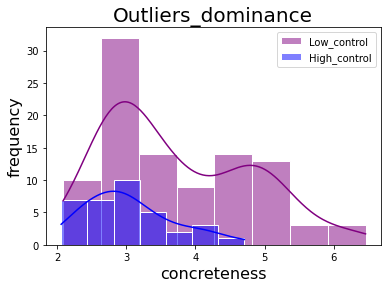

N° Low_Outliers 98
N° High_Outliers 35


In [57]:
sns.histplot(data=OUTLIERS3NEG, x=OUTLIERS3NEG["concreteness"], color="purple", kde=True, edgecolor="white", label="Low_control")
sns.histplot(data=OUTLIERS3POS, x=OUTLIERS3POS["concreteness"], color="blue", kde=True, edgecolor="white", label="High_control")
plt.legend()
plt.title("Outliers_dominance", fontsize=20)
plt.xlabel("concreteness", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° Low_Outliers", OUTLIERS3NEG["word"].count())
print("N° High_Outliers", OUTLIERS3POS["word"].count())

In [58]:
OUTLIERS6 = df.loc[(df['familiarity'] < Lowerfence6)]

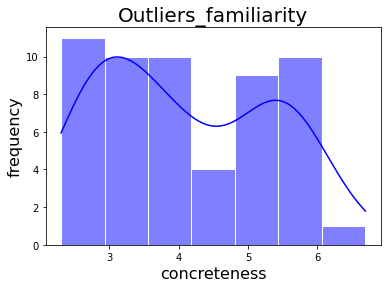

N° Low_Outliers 55


In [59]:
sns.histplot(data=OUTLIERS6, x=OUTLIERS6["concreteness"], color="blue", kde=True, edgecolor="white")
plt.title("Outliers_familiarity", fontsize=20)
plt.xlabel("concreteness", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° Low_Outliers", OUTLIERS6["word"].count())

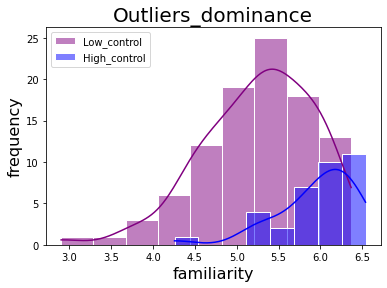

N° Low_Outliers 98
N° High_Outliers 35


In [60]:
sns.histplot(data=OUTLIERS3NEG, x=OUTLIERS3NEG["familiarity"], color="purple", kde=True, edgecolor="white", label="Low_control")
sns.histplot(data=OUTLIERS3POS, x=OUTLIERS3POS["familiarity"], color="blue", kde=True, edgecolor="white", label="High_control")
plt.legend()
plt.title("Outliers_dominance", fontsize=20)
plt.xlabel("familiarity", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° Low_Outliers", OUTLIERS3NEG["word"].count())
print("N° High_Outliers", OUTLIERS3POS["word"].count())

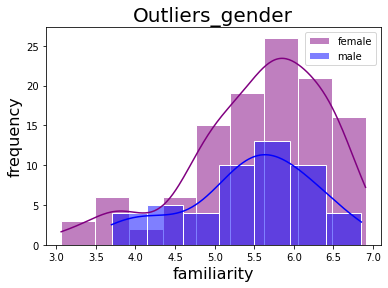

N° Low_Outliers 114
N° High_Outliers 50


In [61]:
sns.histplot(data=OUTLIERS9NEG, x=OUTLIERS9NEG["familiarity"], color="purple", kde=True, edgecolor="white", label="female")
sns.histplot(data=OUTLIERS9POS, x=OUTLIERS9POS["familiarity"], color="blue", kde=True, edgecolor="white", label="male")
plt.legend()
plt.title("Outliers_gender", fontsize=20)
plt.xlabel("familiarity", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° Low_Outliers", OUTLIERS9NEG["word"].count())
print("N° High_Outliers", OUTLIERS9POS["word"].count())

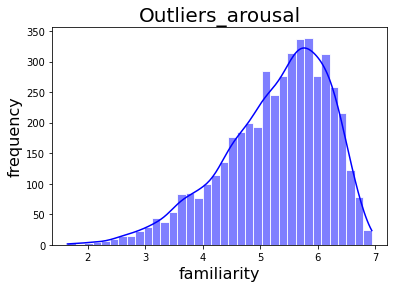

N° High_Outliers 11


In [62]:
sns.histplot(data=df, x=df["familiarity"], color="Blue", kde=True, edgecolor="white")
plt.title("Outliers_arousal", fontsize=20)
plt.xlabel("familiarity", fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.show()
print("N° High_Outliers", OUTLIERS1["word"].count())